Gravity Model
=======

In this notebook we run a gravity model regression corresponding to the example given in the text.  The regression takes the form

$$ \log(export_{ij}) = \log GDP_i + \log GDP_j - \log(distance_{ij}) $$

Thanks to [Matthew McKay](https://github.com/mmcky) for organizing all the data and putting together the first version of this demo.

Data
-----
Trade data is sourced from: http://atlas.media.mit.edu/en/resources/data and uses the SITC rev 2. product level trade dataset. This product level data is aggregated to form a bilateral trade dataset at the country level.

Distance and Geography is sourced from CEPII: http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=6

GDP and Population statistics are from the World Development Indicators: http://data.worldbank.org/data-catalog/world-development-indicators

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from numpy import log
import statsmodels.formula.api as smf

Import Data from a ``csv`` data file for the year 2013

In [35]:
data = pd.read_csv("./data/gravity_dataset_2013.csv")

data.head()

,year,iiso3c,eiso3c,value,contig,comlang_off,colony,dist,distcap,distw,distwces,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
0,2013,ABW,BEL,774353,0,1,0,7847.070,7847.070,7843.255,7843.006,0,0,4.204710e+11,37599.735498,11182817,NaN,NaN,102921
1,2013,ABW,BHS,4712537,0,0,0,1588.515,1588.515,1634.515,1628.143,0,0,7.835118e+09,20736.547344,377841,NaN,NaN,102921
2,2013,ABW,CHE,17812626,0,0,0,8056.332,8056.332,8074.21,8073.511,1,0,4.772463e+11,58996.896141,8089346,NaN,NaN,102921
3,2013,ABW,CHN,25319168,0,0,0,14155.350,14155.350,14590.92,14560.28,0,0,4.912954e+12,3619.439108,1357380000,NaN,NaN,102921
4,2013,ABW,COL,22160086,0,1,0,1036.634,1036.634,929.5887,861.2452,0,0,2.129079e+11,4497.196936,47342363,NaN,NaN,102921


Description of the data

In [5]:
data.describe()

,year,value,contig,comlang_off,colony,dist,distcap,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
count,26886,2.549100e+04,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,2.544700e+04,25447.000000,2.688600e+04,2.618400e+04,26184.000000,2.688600e+04
mean,2013,9.902996e+08,0.020494,0.157033,0.015696,7700.812375,7667.895301,0.172432,0.171799,4.728611e+11,12217.536595,4.532196e+07,5.963956e+11,14242.164850,5.475265e+07
std,0,8.747958e+09,0.141685,0.363839,0.124298,4454.436588,4453.037401,0.377762,0.377213,1.715557e+12,16554.072884,1.484285e+08,1.920917e+12,17643.256626,1.678096e+08
min,2013,1.000000e+00,0.000000,0.000000,0.000000,8.300385,8.300385,0.000000,0.000000,2.620733e+07,150.744900,9.876000e+03,1.203875e+08,150.744900,2.091900e+04
25%,2013,1.034865e+05,0.000000,0.000000,0.000000,4221.304000,4153.092750,0.000000,0.000000,8.204074e+09,1122.482815,2.897366e+06,1.303300e+10,1467.611736,3.872684e+06
50%,2013,3.715586e+06,0.000000,0.000000,0.000000,7291.663000,7264.896000,0.000000,0.000000,3.150948e+10,4497.196936,1.028141e+07,5.823843e+10,5896.096631,1.088650e+07
75%,2013,8.051373e+07,0.000000,0.000000,0.000000,10738.990000,10693.975000,0.000000,0.000000,2.124327e+11,15447.307422,3.378138e+07,3.237434e+11,22152.412473,4.369288e+07
max,2013,4.220679e+11,1.000000,1.000000,1.000000,19812.040000,19812.040000,1.000000,1.000000,1.445151e+13,79511.205382,1.357380e+09,1.445151e+13,79511.205382,1.357380e+09


In [6]:
data.columns

Index(['year', 'iiso3c', 'eiso3c', 'value', 'contig', 'comlang_off', 'colony',
       'dist', 'distcap', 'distw', 'distwces', 'ell', 'ill', 'egdp', 'egdppc',
       'epop', 'igdp', 'igdppc', 'ipop'],
      dtype='object')

### Estimation 

Estimate the basic gravity model

In [36]:
formula = "log(value) ~ log(egdp) + log(igdp) + log(dist)"
model = smf.ols(formula, data)
result = model.fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.551e+04
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:16:23   Log-Likelihood:                -56160.
No. Observations:               23545   AIC:                         1.123e+05
Df Residuals:                   23541   BIC:                         1.124e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.6140      0.344    -89.031      0.0

The next cell writes this table to a file in LaTeX format.

In [19]:
summ = result.summary()
with open("./result_summary.tex", 'w') as f:
    f.write(summ.as_latex())

### Replication Using Linear Algebra

Let's try to replicate the values of the estimated coefficients $\hat \beta_k$ using matrix algebra.  The first step is to extract the variables we care about and drop all rows with missing values.

In [27]:
data2 = data[['value', 'egdp', 'igdp', 'dist']]
data2 = data2.dropna()

Now let's compute the coefficients directly.

In [37]:
from numpy.linalg import inv

y = np.asarray(np.log(data2.value))
X = np.ones((len(y), 4))
X[:, 1] = log(data2.egdp)
X[:, 2] = log(data2.igdp)
X[:, 3] = log(data2.dist)

betahat = inv(X.T @ X) @ X.T @ y
print(betahat)

[-30.61404678   1.28388089   1.04190019  -1.359129  ]


Sure enough, the values match with those given in the table above.

In [14]:
Py = dot(X, betahat)
My = y - Py

### Additional Regressors

Estimate the model with some additional explanatory variables

In [38]:
model2 = smf.ols("log(value) ~ log(egdp) + log(igdp) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result2 = model2.fit()
result2 = result2.get_robustcov_results()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6322.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:21:58   Log-Likelihood:                -55642.
No. Observations:               23545   AIC:                         1.113e+05
Df Residuals:                   23536   BIC:                         1.114e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -30.8815      0.347    -89.065      

Estimating the model with GDPPC instead of GDP

Plot
----

A plot of components of the basic model

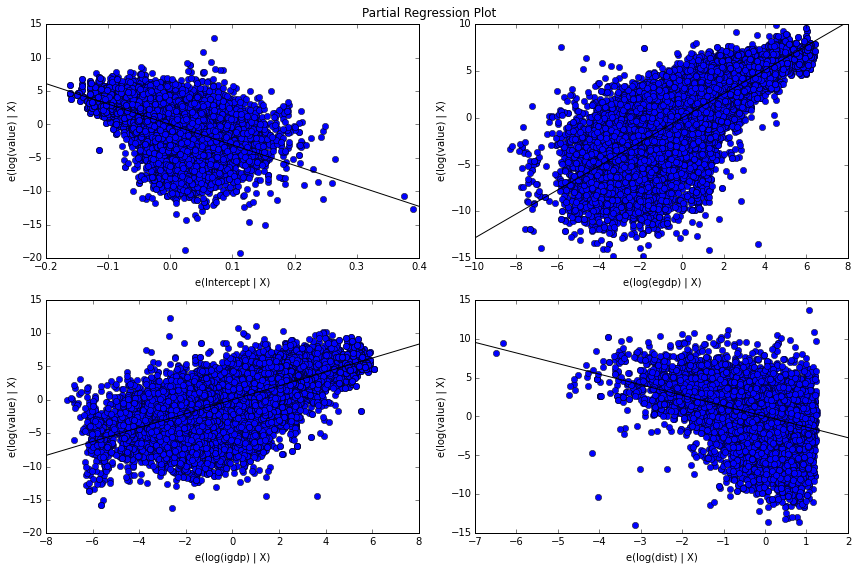

In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

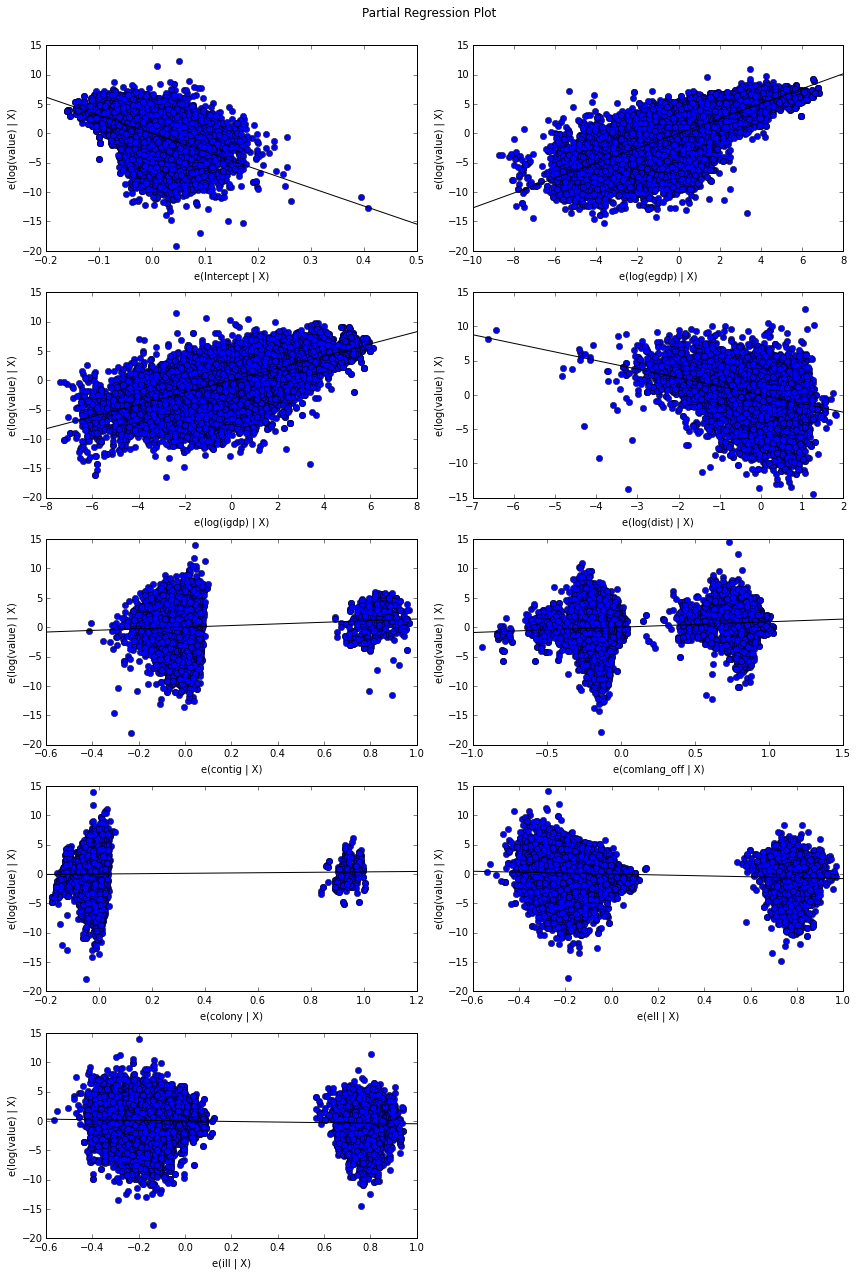

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,18))
fig = sm.graphics.plot_partregress_grid(result2, fig=fig)

Additional Specifications
-----------------------------

- model1b includes population size of exporter and importer
- model3 uses gdppc in place of gdp

In [24]:
model1b = smf.ols("log(value) ~ log(egdp) + log(epop) + log(igdp) + log(ipop) + log(dist)", data)
result1b = model1b.fit()
result1b = result1b.get_robustcov_results()
print(result1b.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     9665.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:12:16   Log-Likelihood:                -56089.
No. Observations:               23545   AIC:                         1.122e+05
Df Residuals:                   23539   BIC:                         1.122e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.6831      0.344    -89.250      0.0

In [25]:
#-Model with additional Explanatory Variables-#
model3 = smf.ols("log(value) ~ log(egdppc) + log(igdppc) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result3 = model3.fit()
result3 = result3.get_robustcov_results()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1371.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:12:16   Log-Likelihood:                -65569.
No. Observations:               23545   AIC:                         1.312e+05
Df Residuals:                   23536   BIC:                         1.312e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      10.8041      0.372     29.075      